In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston= load_boston()

In [2]:
#target is to be predicted
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
df= pd.DataFrame(boston.data, columns=boston.feature_names)
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       1

<AxesSubplot:>

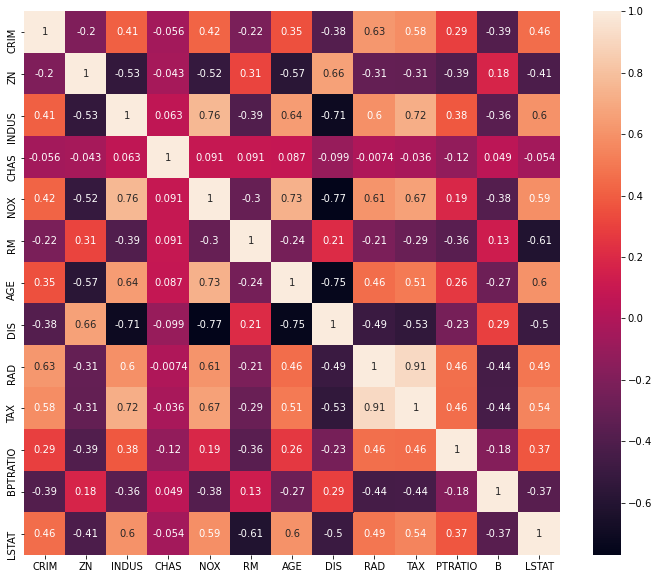

In [5]:
plt.figure(figsize=(12,10))
import seaborn as sns 
sns.heatmap(df.corr(), annot=True)

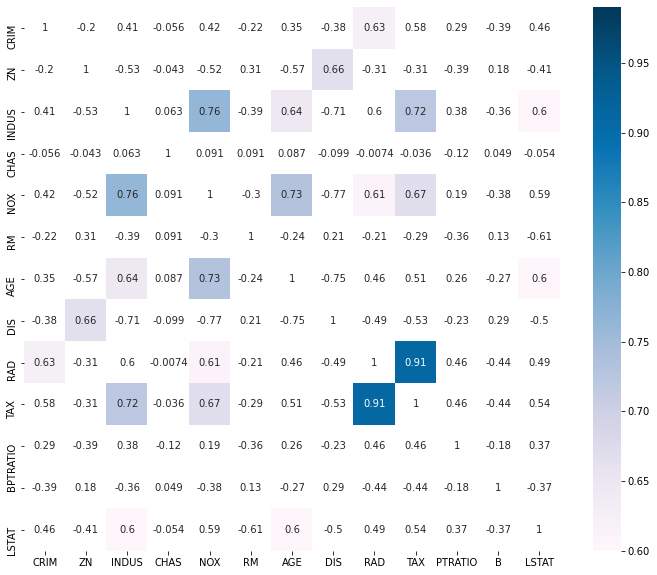

In [6]:
#how to indicate abs value
plt.figure(figsize=(12,10))
from copy import copy
my_cmap = copy(plt.cm.PuBu)
my_cmap.set_over("white")
my_cmap.set_under("white")
g = sns.heatmap(df.corr(),vmin=abs(-0.6),vmax=abs(-0.99),cmap=my_cmap, annot=True)


In [7]:
df['target']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM


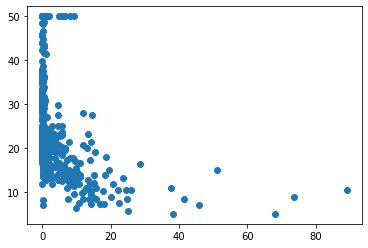

ZN


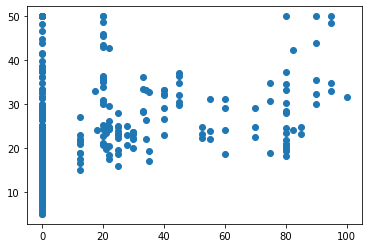

INDUS


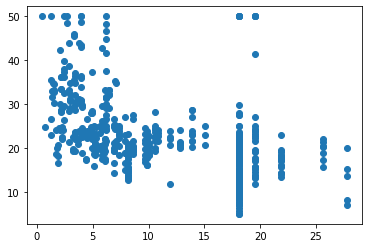

CHAS


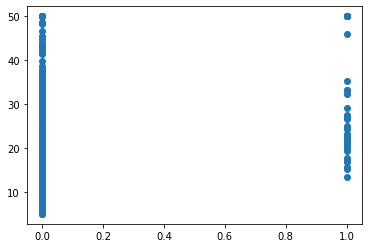

NOX


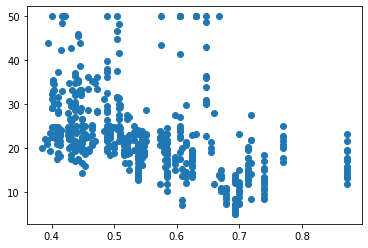

RM


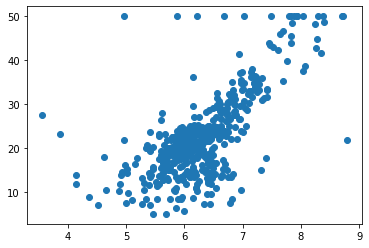

AGE


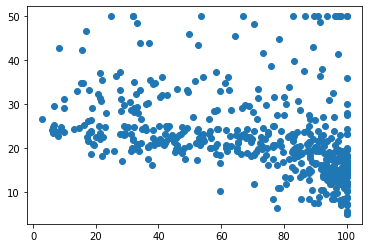

DIS


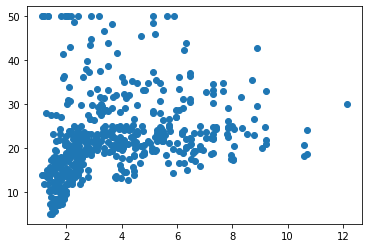

RAD


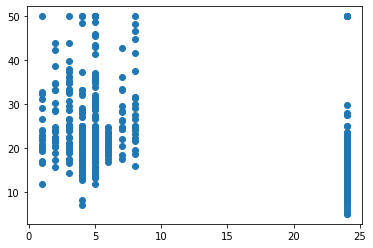

TAX


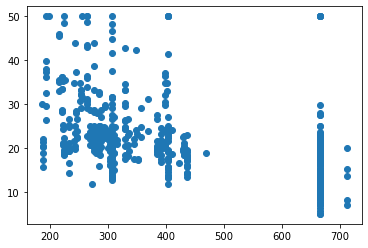

PTRATIO


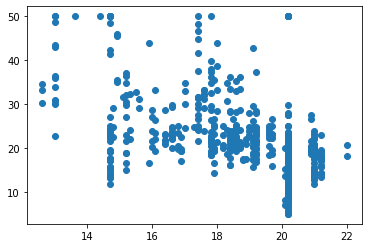

B


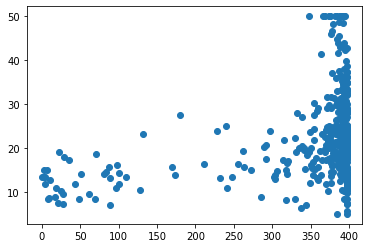

LSTAT


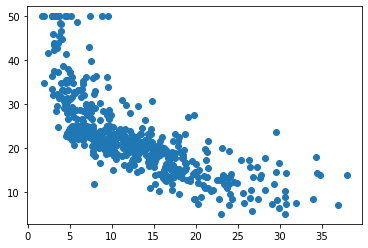

In [8]:
col=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

for i in col[:]:
    print(i)
    plt.figure()
    plt.scatter(df[i],df['target'])
    plt.show()


In [9]:
%matplotlib inline

Text(0, 0.5, 'target')

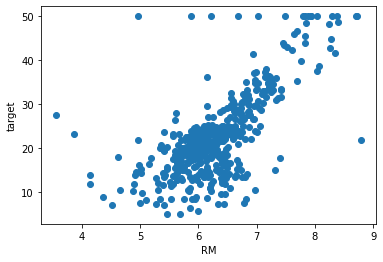

In [10]:
plt.scatter(df['RM'],df['target'])
plt.xlabel('RM')
plt.ylabel('target')


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [12]:
#within cluster sum of squared
import sklearn.cluster as cluster
K=range(1,20)
wss=[]
for i in K:
    kmeans=cluster.KMeans(n_clusters=i,init="k-means++")
    kmeans=kmeans.fit(df[['RM','target']])
    wss_a=kmeans.inertia_
    wss.append(wss_a)

In [13]:
centers=pd.DataFrame({'Clusters':K,'WSS':wss})
centers

,Clusters,WSS
0,1,42965.599194
1,2,15835.527573
2,3,8162.666611
3,4,3893.557836
4,5,2603.305342
5,6,1926.406789
6,7,1342.526760
7,8,1065.675508
8,9,862.113325
9,10,709.102400


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

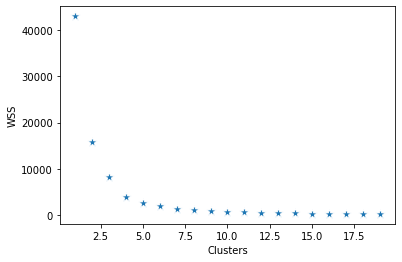

In [14]:
sns.scatterplot(x='Clusters',y='WSS',data=centers,marker='*',s=100)

In [15]:
km=KMeans(n_clusters=4)
cluster_group= km.fit_predict(df[['RM','target']])
df['cluster']=cluster_group
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  cluster  
0       15.3  396.90  

In [16]:
km.fit(df[['RM','target']])
y_km = km.predict(df[['RM','target']])
print(km.cluster_centers_)

[[ 6.85231818 31.35909091]
 [ 6.11818462 21.27653846]
 [ 7.65115625 47.2125    ]
 [ 5.88457143 12.69285714]]


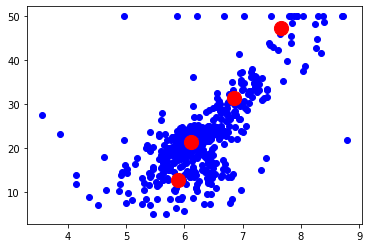

In [17]:
plt.scatter(df['RM'],df['target'],c='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',s=200)
plt.show()

In [18]:
#convert it to numpy array 
#df.iloc 
# j=df[['RM','target']]
#j[:,0],j[:,1],c='red'


Text(0, 0.5, 'price')

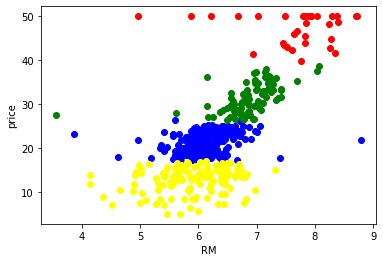

In [19]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]

plt.scatter(df1['RM'],df1['target'],color='blue')
plt.scatter(df2['RM'],df2['target'],color='red')
plt.scatter(df3['RM'],df3['target'],color='yellow')
plt.scatter(df4['RM'],df4['target'],color='green')

plt.xlabel('RM')
plt.ylabel('price')


In [20]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','cluster'],axis='columns')
X.head
y=df['cluster']

In [21]:
#how well the classifier is able to predict
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.svm import SVC
model=SVC()

In [23]:
model.fit(X_train, y_train)

SVC()

In [24]:
model.score(X_test,y_test)

0.696078431372549

In [40]:
svc = SVC(C=1,decision_function_shape='ovo')
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.5891089108910891
0.696078431372549


In [52]:
svc = SVC(C=1,kernel='poly',decision_function_shape='ovo')
svc.fit(X_train, y_train.values)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.6361386138613861
0.7156862745098039


In [53]:
#3 classes?
#why 3rd class precision 0.
from sklearn import metrics
y_pred = svc.predict(X_test) 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        58
           1       0.00      0.00      0.00         2
           2       0.79      0.73      0.76        26
           3       0.00      0.00      0.00        16

    accuracy                           0.72       102
   macro avg       0.37      0.42      0.39       102
weighted avg       0.60      0.72      0.65       102



/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
y_test.values

array([3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 0, 3, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 3, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 3, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 3], dtype=int32)

In [44]:
y_pred

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0], dtype=int32)

In [54]:
classifiers=np.arange(1,30)
train_accuracy=np.empty(len(classifiers))
test_accuracy=np.empty(len(classifiers))
for i,k in enumerate(classifiers):
    svc=SVC(C=k)
    svc.fit(X_train, y_train)
    train_accuracy[i]=svc.score(X_train, y_train)
    test_accuracy[i]=svc.score(X_test, y_test)

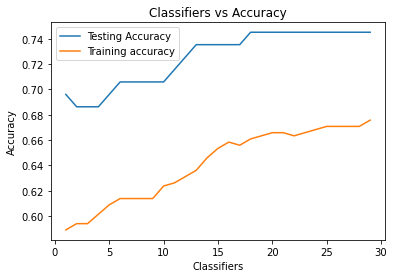

In [56]:
plt.title('Classifiers vs Accuracy')
plt.plot(classifiers, test_accuracy, label='Testing Accuracy')
plt.plot(classifiers, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()

In [57]:
X=df.drop(['target','cluster'],axis='columns').values
y=df['target'].values

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [59]:
from sklearn.svm import SVR
model=SVR()

In [60]:
model.fit(X_train, y_train)

SVR()

In [61]:
model.score(X_test,y_test)

0.2740342100048835

In [62]:
scaler = MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)
svr=SVR()
svr.fit(X_train_scaled,y_train)
print(svr.score(X_train_scaled, y_train))
print(svr.score(X_test_scaled, y_test))

0.5986513231219315
0.6805950395199005


In [63]:
#why, 50 and (1,4)
bins = np.array([0,20,40,50])
df['bucket']=pd.cut(df['target'], bins, labels=range(1,4))
print(df)
print(df.isnull().sum())

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  cluster bucket  
0       15.3  396.90   4.98    24.0        0 

In [64]:
# df1 = df[df.isna().any(axis=1)]
# print(df1)

In [65]:
X=df.drop(['target','cluster','bucket'],axis='columns').values
y=df['bucket'].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)


In [66]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,30)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i]=knn.score(X_train, y_train)
    test_accuracy[i]=knn.score(X_test, y_test)
    

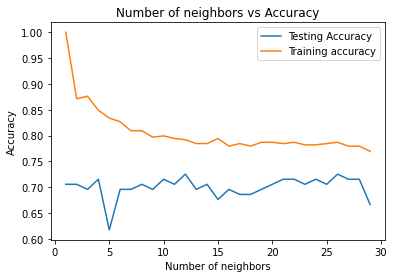

In [67]:
plt.title('Number of neighbors vs Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [68]:
knn = KNeighborsClassifier(n_neighbors=15)

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [70]:
y_knn = knn.predict(X_test)
knn.score(X_test,y_test)

0.6764705882352942

In [71]:
from sklearn import linear_model

In [72]:
reg= linear_model.LinearRegression()
reg.fit(df[['AGE', 'DIS', 'RAD']],df.target)

LinearRegression()

In [73]:
reg.predict([[40,3,1]])

array([29.32782946])

In [74]:
X=df[['AGE', 'DIS', 'RAD']].values
y=df['target'].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
y_pred= reg.predict(X_test)


In [75]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.1328669613105955

In [76]:
# Root Mean Squared Error
num=np.mean((y_pred- y_test)**2)
num**(.5)

8.854896280598044

In [77]:
from scipy import stats
a = y_test
b = y_pred
slope, intercept, r_value, p_value, std_err = stats.linregress(a,b)

regline = lambda Z: slope*a +intercept
Z=np.array([a.min(),a.max()])



Text(0.5, 1.0, 'Predicted Price vs Prices')

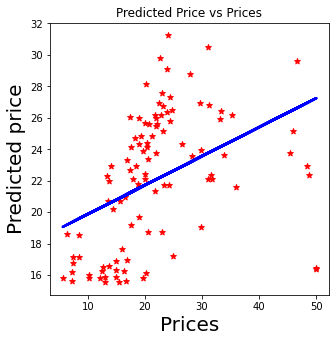

In [78]:
plt.figure(figsize=(5,5))
plt.scatter(a,b,color='Red',marker='*')
plt.plot(a,regline(Z),lw=2.5, c="BLUE")
plt.xlabel("Prices",{'size':20})
plt.ylabel("Predicted price",{'size':20})
plt.title("Predicted Price vs Prices")